# Introducing KCK

Through this series of Jupyter notebooks, I will introduce KCK, which stands for Knowledge Construction Kit, a toolkit for building distributed data pipelines and scalable web services.

To do this, I've contrived an analysis process that's both expensive computationally and very similar to the sorts of processes that developers wrestle with all the time.

Each notebook in the series will be brief and will build on the one before it to highlight a key KCK feature or concept and its impact on the process.

## The process

First, we import from a [libary and setup notebook](/notebooks/notebooks/stores/common.ipynb) that will be common to all the notebooks in this series.



In [1]:
import kck_analysis.lib.notebook_imports
import matplotlib.pyplot as plt
import kck_analysis.notebooks.stores.common
from kck_analysis.notebooks.stores.common import (
    get_heatmap_data, time_code, find_nearest_stores, db, 
    rollback_database, get_store_revenue_objects, update_revenue_object,
    GRID_X_MAX, GRID_Y_MAX, 
    NUM_STORES, YEAR_OF_INTEREST, NEIGHBOR_SEARCH_DIST
)


This defines some models and seeds the database with 200 hypothetical coffee shops in a perfectly gridded 20 square city blocks and imaginary 2016 revenue numbers for each month.

Each store is also assigned a random location on a 2000 x 2000 grid.

And now we process data.

The analysis iterates over each store, fetches all other stores within 3 blocks and computes which percentile the store belongs in compared to the revenue numbers of its neighbors.

There can be more than one store on a block, so when we turn this data into a heatmap, the meaning of "hotter" blocks is debatable, but it doesn't really matter.  It's a terrible statististical analysis of what amounts to random noise that serves no purpose other than to be slow and similar to the kinds of O(n) or O(n^2) problems that developers face every day.

execution time: 4.924s


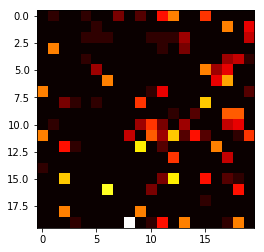

In [2]:
with time_code():
    map_data = get_heatmap_data()
plt.imshow(map_data[12], cmap='hot', interpolation='nearest')
plt.show()

We can run the numbers a few more times to see how quickly subsequent passes will execute.

In [3]:
with time_code():
    map_data = get_heatmap_data()

execution time: 4.226s


In [4]:
with time_code():
    map_data = get_heatmap_data()

execution time: 3.952s


...so it's not particularly fast.

Finally, we update the revenue numbers for one of the stores.

In [5]:
# grab the closest store to the middle of the grid
median_store_id = find_nearest_stores(int(GRID_X_MAX/2), int(GRID_Y_MAX/2))[0][0]

# update the revenues for the middle store
revenue_object_list = get_store_revenue_objects(median_store_id)
for revenue_obj in revenue_object_list:
    update_revenue_object(revenue_obj.id, revenue_obj.revenue * 5)
    

And we run the analysis again.  The execution time roughly matches that of each preceding run.

execution time: 3.951s


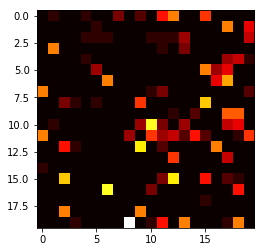

In [6]:
with time_code():
    map_data = get_heatmap_data()
plt.imshow(map_data[12], cmap='hot', interpolation='nearest')
plt.show()

So this gives us a performance baseline for a process that uses reasonably performant queries of a relational database to perform a computationally expensive data product.

The next notebook in this series will add some basic caching to achieve some easy performance gains.

In [7]:
rollback_database()